In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import environment
import policy_iteration
import value_iteration


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


grid size: 4 5
grid:
[[  0  -1  -1  -1  -1]
 [-10 -10  -1 -10 -10]
 [ -1  -1  -1 -10  -1]
 [-10 -10  -1 -10  -1]]
--- policy iteration ---
[[  0.   0.  -1.  -2.  -3.]
 [  0.   0.  -2.  -3.  -4.]
 [ -5.  -4.  -3.  -4. -14.]
 [ -6.  -5.  -4.  -5. -15.]]
[['↑' '←' '←' '←' '←']
 ['↑' '↑' '↑' '↑' '↑']
 ['→' '→' '↑' '←' '↑']
 ['↑' '↑' '↑' '←' '↑']]


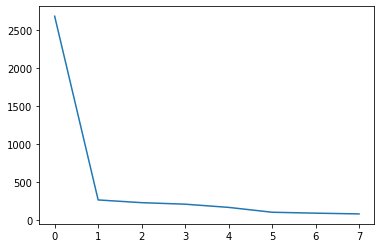

--- value iteration ---
[[  0.   0.  -1.  -2.  -3.]
 [  0.   0.  -2.  -3.  -4.]
 [ -5.  -4.  -3.  -4. -14.]
 [ -6.  -5.  -4.  -5. -15.]]
[['↑' '←' '←' '←' '←']
 ['↑' '↑' '↑' '↑' '↑']
 ['→' '→' '↑' '←' '↑']
 ['↑' '↑' '↑' '←' '↑']]


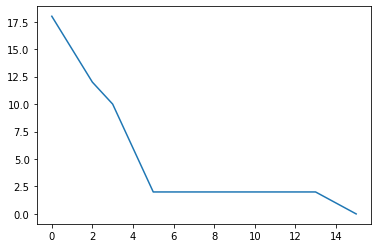

In [42]:
def to_arrow(pi):
    directions = []
    arrows = ["↑", "→", "↓", "←"]
    for actions in pi:
        for i in range(4):
            if actions[i] > 0:
                directions.append(arrows[i])
    
    return directions

def run():
    n_row = 4
    n_col = 5
    print("grid size:", n_row, n_col)
    print("grid:")
    grid_reward = np.array([
        0, -1, -1, -1, -1,
        -10, -10, -1, -10, -10,
        -1, -1, -1, -10, -1,
        -10, -10, -1, -10, -1
    ])
    terminals = [(1, 1)]
    print(np.reshape(grid_reward, (4, 5)))
    env = environment.create_env(n_row, n_col, grid_reward, terminals)

    S = [s for s in range(n_row * n_col)]
    A = [a for a in range(4)]

    discount = 1
    
    print("--- policy iteration ---")
    v, pi, log = policy_iteration.learn(S, A, env, discount)
    print(np.reshape(v, (n_row, n_col)))
    print(np.reshape(to_arrow(pi), (n_row, n_col)))
    plt.plot(log)
    plt.show()
    
    print("--- value iteration ---")
    v, pi, log = value_iteration.learn(S, A, env, discount)
    print(np.reshape(v, (n_row, n_col)))
    print(np.reshape(to_arrow(pi), (n_row, n_col)))
    plt.plot(log)
    plt.show()


run()